In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import datetime

In [3]:
train = pd.read_csv('train.csv')
X, y = np.reshape(np.array(train.iloc[:,1:]), (-1, 28,28 ,1)), train.iloc[:,0]

In [6]:
X_train, X_val, y_train, y_val = train_test_split(X, y, stratify=y, random_state=42, test_size = .2, shuffle=True)

In [7]:
X_train = tf.convert_to_tensor(X_train, dtype = 'float32')
X_val = tf.convert_to_tensor(X_val, dtype = 'float32')
y_train = tf.convert_to_tensor(y_train, dtype = 'float32')
y_val = tf.convert_to_tensor(y_val, dtype = 'float32')

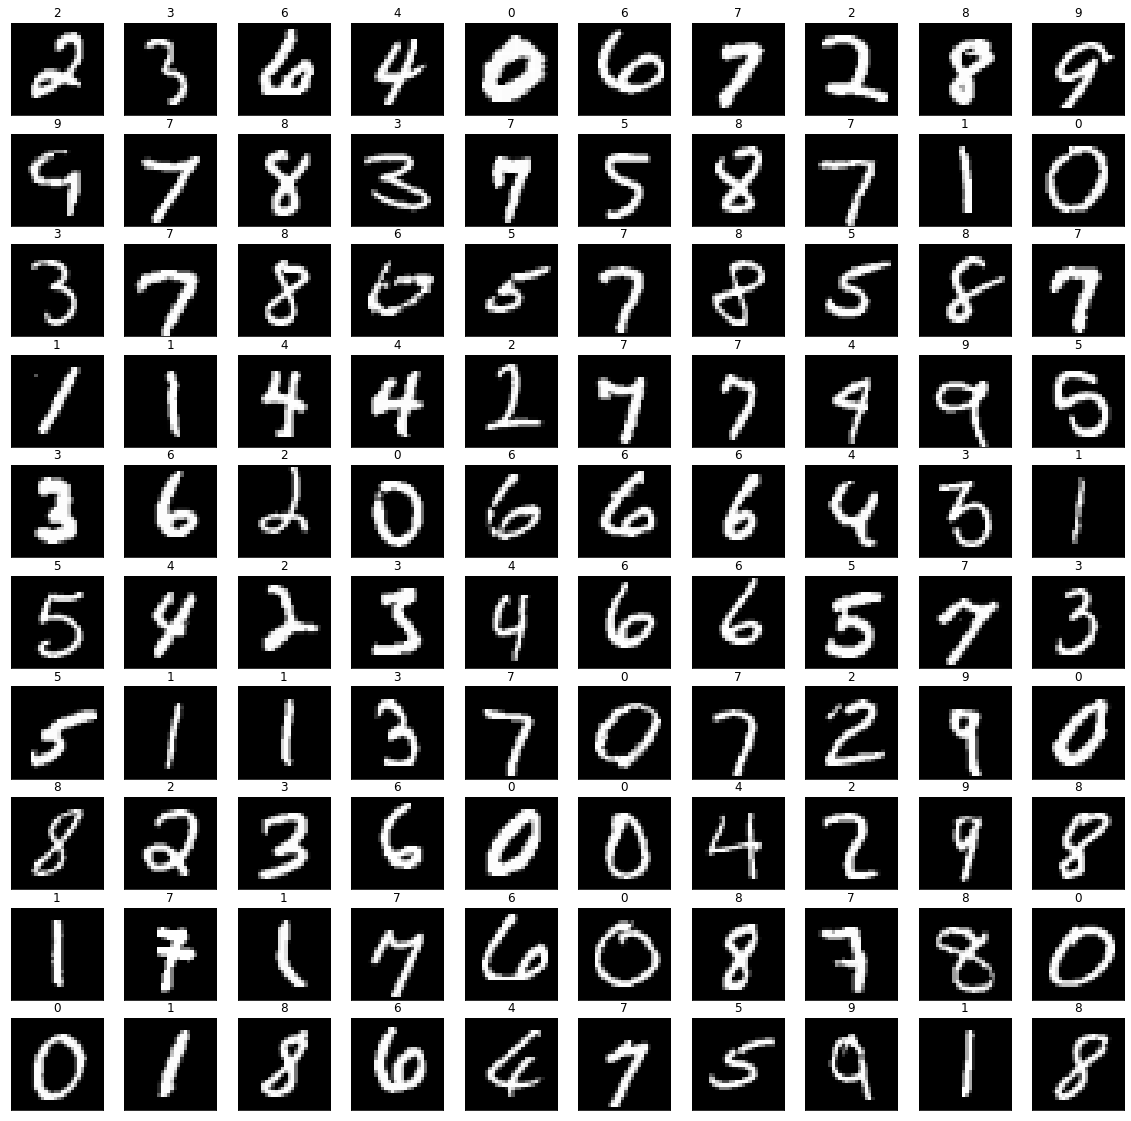

In [8]:
fig, ax = plt.subplots(10, 10, figsize = (20,20))
for i, xy in enumerate(zip(X_train[:100], y_train[:100])):
    x, y = xy
    ax[i//10, i%10].imshow(x, cmap = plt.cm.gray)
    ax[i//10, i%10].set_title(y.numpy().astype('int32'))
    ax[i//10, i%10].set_xticks([])
    ax[i//10, i%10].set_yticks([])

## MLP  

In [6]:
mlp = tf.keras.Sequential([
    tf.keras.layers.Reshape((-1, 784))
] + [
    tf.keras.layers.Dense(1000, activation = 'relu', kernel_initializer = 'he_normal') for _ in range(5)
] + [
    tf.keras.layers.Dropout(.5),
    tf.keras.layers.Dense(10, activation ='softmax')
])

In [7]:
mlp.compile(optimizer = tf.keras.optimizers.RMSprop(.0001),
            loss = tf.keras.losses.SparseCategoricalCrossentropy(),
            metrics = 'accuracy'
           )
mlp.fit(X_train, y_train, validation_data=(X_val, y_val), batch_size = 64,
       callbacks = [tf.keras.callbacks.EarlyStopping(patience = 5, restore_best_weights=True)],
       epochs = 10000)

Epoch 1/10000
525/525 [==============================] - 26s 46ms/step - loss: 27.3630 - accuracy: 0.7101 - val_loss: 1.4703 - val_accuracy: 0.9288
Epoch 2/10000
525/525 [==============================] - 24s 46ms/step - loss: 1.8499 - accuracy: 0.9026 - val_loss: 0.6950 - val_accuracy: 0.9370
Epoch 3/10000
525/525 [==============================] - 23s 44ms/step - loss: 0.8004 - accuracy: 0.9201 - val_loss: 0.4191 - val_accuracy: 0.9451
Epoch 4/10000
525/525 [==============================] - 24s 46ms/step - loss: 0.4890 - accuracy: 0.9364 - val_loss: 0.4757 - val_accuracy: 0.9437
Epoch 5/10000
525/525 [==============================] - 25s 47ms/step - loss: 0.3617 - accuracy: 0.9470 - val_loss: 0.3467 - val_accuracy: 0.9580
Epoch 6/10000
525/525 [==============================] - 23s 43ms/step - loss: 0.2736 - accuracy: 0.9585 - val_loss: 0.3958 - val_accuracy: 0.9555
Epoch 7/10000
525/525 [==============================] - 24s 45ms/step - loss: 0.2251 - accuracy: 0.9656 - val_loss: 

## Classic CNN

In [16]:
cnn = tf.keras.Sequential()
for i in range(2):
    cnn.add(tf.keras.layers.Conv2D(5 * (i + 2),
                                   kernel_size = (5,5),
                                   padding = 'same',
                                   activation = 'relu'
                                  )
           )
    cnn.add(tf.keras.layers.MaxPool2D(pool_size = (2,2),
                                      strides = (2,2),
                                      padding = 'valid'
                                     )
           )
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dropout(.5))
cnn.add(tf.keras.layers.Dense(10, activation ='softmax'))

In [17]:
cnn.compile(optimizer = tf.keras.optimizers.RMSprop(.0001),
            loss = tf.keras.losses.SparseCategoricalCrossentropy(),
            metrics = 'accuracy'
           )
cnn.fit(X_train, y_train, validation_data=(X_val, y_val), batch_size = 64,
       callbacks = [tf.keras.callbacks.EarlyStopping(patience = 5, restore_best_weights=True)],
       epochs = 10000)

Epoch 1/10000
525/525 [==============================] - 14s 25ms/step - loss: 25.9021 - accuracy: 0.2281 - val_loss: 0.7276 - val_accuracy: 0.7610
Epoch 2/10000
525/525 [==============================] - 13s 24ms/step - loss: 1.1172 - accuracy: 0.6472 - val_loss: 0.3388 - val_accuracy: 0.8912
Epoch 3/10000
525/525 [==============================] - 13s 24ms/step - loss: 0.6193 - accuracy: 0.8009 - val_loss: 0.2346 - val_accuracy: 0.9265
Epoch 4/10000
525/525 [==============================] - 13s 24ms/step - loss: 0.4469 - accuracy: 0.8602 - val_loss: 0.1842 - val_accuracy: 0.9423
Epoch 5/10000
525/525 [==============================] - 13s 24ms/step - loss: 0.3510 - accuracy: 0.8902 - val_loss: 0.1577 - val_accuracy: 0.9513
Epoch 6/10000
525/525 [==============================] - 13s 24ms/step - loss: 0.3013 - accuracy: 0.9051 - val_loss: 0.1368 - val_accuracy: 0.9569
Epoch 7/10000
525/525 [==============================] - 13s 24ms/step - loss: 0.2664 - accuracy: 0.9193 - val_loss: 

## VGG like CNN

In [20]:
vgg = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters = 8,
                           kernel_size = (3,3),
                           activation = 'relu',
                           padding = 'same'
                          ) for _ in range(2)
] + [
    tf.keras.layers.MaxPool2D(pool_size = 2,
                              strides = 2,
                              padding = 'same'
                             )
] + [
    tf.keras.layers.Conv2D(filters = 16,
                       kernel_size = (3,3),
                       activation = 'relu',
                       padding = 'same'
                      ) for _ in range(3)
] + [
    tf.keras.layers.MaxPool2D(pool_size = 2,
                              strides = 2,
                              padding = 'same'
                             )
] + [
    tf.keras.layers.Conv2D(filters = 32,
                           kernel_size = (3,3),
                           activation = 'relu',
                           padding = 'same'
                          ) for _ in range(3)
] + [
    tf.keras.layers.MaxPool2D(pool_size = 2,
                              strides = 2,
                              padding = 'same'
                             )
] + [
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1000, activation = 'relu'),
    tf.keras.layers.Dropout(.5),
    tf.keras.layers.Dense(1000, activation = 'relu'),
    tf.keras.layers.Dropout(.5),
    tf.keras.layers.Dense(10, activation = 'softmax')
])

In [21]:
vgg.compile(optimizer = tf.keras.optimizers.RMSprop(.0001),
            loss = tf.keras.losses.SparseCategoricalCrossentropy(),
            metrics = 'accuracy'
           )
vgg.fit(X_train, y_train, validation_data=(X_val, y_val), batch_size = 64,
       callbacks = [tf.keras.callbacks.EarlyStopping(patience = 5, restore_best_weights=True)],
       epochs = 10000)

Epoch 1/10000
525/525 [==============================] - 37s 67ms/step - loss: 1.3014 - accuracy: 0.5642 - val_loss: 0.1430 - val_accuracy: 0.9560
Epoch 2/10000
525/525 [==============================] - 34s 66ms/step - loss: 0.2002 - accuracy: 0.9374 - val_loss: 0.0926 - val_accuracy: 0.9719
Epoch 3/10000
525/525 [==============================] - 34s 65ms/step - loss: 0.1207 - accuracy: 0.9626 - val_loss: 0.0763 - val_accuracy: 0.9748
Epoch 4/10000
525/525 [==============================] - 34s 66ms/step - loss: 0.0908 - accuracy: 0.9724 - val_loss: 0.0870 - val_accuracy: 0.9731
Epoch 5/10000
525/525 [==============================] - 34s 66ms/step - loss: 0.0717 - accuracy: 0.9769 - val_loss: 0.0668 - val_accuracy: 0.9793
Epoch 6/10000
525/525 [==============================] - 34s 65ms/step - loss: 0.0629 - accuracy: 0.9797 - val_loss: 0.0687 - val_accuracy: 0.9788
Epoch 7/10000
525/525 [==============================] - 35s 66ms/step - loss: 0.0524 - accuracy: 0.9845 - val_loss: 0

## EnsCnn

In [228]:
class Cnn(tf.keras.layers.Layer):
    def __init__(self):
        super(Cnn, self).__init__()

        self.Conv = tf.keras.Sequential([
            Conv(filters=64,
                 padding='valid'
                 ),
            Conv(filters=128),
            Conv(filters=256,
                 padding='valid',
                 pool=True
                 ),
            Conv(filters=512,
                 padding='valid'
                 ),
            Conv(filters=1024),
            Conv(filters=2000,
                 padding='valid',
                 pool=True
                 )
        ])

    def call(self, X):
        y = self.Conv(X)
        return y


class Subnetwork(tf.keras.layers.Layer):
    def __init__(self, n_nodes, drop_rate, n_labels):
        super(Subnetwork, self).__init__()
        self.n_nodes = n_nodes
        self.drop_rate = drop_rate
        self.n_labels = n_labels

        self.classifier = tf.keras.Sequential([
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(self.n_nodes,
                                  activation='relu',
                                  ),
            tf.keras.layers.BatchNormalization(),
            tf.keras.layers.Dropout(self.drop_rate),
            Dropconnectdense(units=self.n_nodes,
                             activation='relu',
                             prob=self.drop_rate
                             ),
            tf.keras.layers.Dense(self.n_labels,
                                  activation='softmax'
                                  )
        ])

    def call(self, X):
        return self.classifier(X)

class Subnetworks(tf.keras.layers.Layer):
    def __init__(self, n_labels):
        super(Subnetworks, self).__init__()
        self.n_labels = n_labels

        self.subnetworks = [Subnetwork(n_nodes=512,
                                       drop_rate=.5,
                                       n_labels=self.n_labels
                                       ) for _ in range(10)
                            ]

    def call(self, X):
        X = tf.split(X,
                     num_or_size_splits = 10,
                     axis = -1)
        y = [subnet(divition) for divition, subnet in zip(X, self.subnetworks)]
        return y

class Ensnet(tf.keras.models.Model):
    def __init__(self, n_labels):
        super(Ensnet, self).__init__()
        self.n_labels = n_labels
        
        self.augumentation = tf.keras.layers.experimental.preprocessing.RandomRotation(factor = .025)
        self.cnn = Cnn()
        self.cnn_classifier = tf.keras.Sequential([
            tf.keras.layers.GlobalAvgPool2D(),
            tf.keras.layers.Dense(512,
                                  activation = 'relu',
                                  ),
            tf.keras.layers.BatchNormalization(),
            tf.keras.layers.Dropout(.5),
            Dropconnectdense(units=512,
                             activation='relu',
                             prob=.5
                             ),
            tf.keras.layers.Dense(10,
                                  activation = 'softmax'
                                  )
        ])
        self.subnets = Subnetworks(self.n_labels)

    def compile(self, loss_fn, optimizer, metrics):
        super(Ensnet, self).compile()
        self.loss_fn = loss_fn
        self.cnn_optimizer = optimizer
        self.sub_optimizer = optimizer
        self.cm = metrics

    @tf.function
    def get_mode(self, X):
        y, idx, count = tf.unique_with_counts(X)
        return y[tf.argmax(count)]

    @tf.function
    def train_step(self, Input):
        X, y = Input
        X = self.augumentation(X)
        
        with tf.GradientTape() as tape:
            features = self.cnn(X)
            preds_cnn = self.cnn_classifier(features)
            loss_c = self.loss_fn(y, preds_cnn)
        grads = tape.gradient(loss_c, self.cnn.trainable_variables + self.cnn_classifier.trainable_variables)
        self.cnn_optimizer.apply_gradients(
            zip(grads, self.cnn.trainable_variables + self.cnn_classifier.trainable_variables)
        )

        with tf.GradientTape() as tape:
            features = self.cnn(X)
            preds_subs = self.subnets(features)
            loss_s = []
            for y_hat_ in preds_subs:
                loss_s.append(self.loss_fn(y, y_hat_))
        grads = tape.gradient(loss_s, self.subnets.trainable_variables)
        self.sub_optimizer.apply_gradients(
            zip(grads, self.subnets.trainable_variables)
        )
        preds = tf.argmax(tf.stack([preds_cnn]+preds_subs, axis=1),
                          axis = -1)
        preds = tf.map_fn(fn=self.get_mode, elems=preds)
        m = self.cm(y, preds)
        return {'mean loss': loss_c + sum(loss_s) / 11, f'{self.cm.name}': m}

    @tf.function
    def test_step(self, Input):
        X, y = Input
        features = self.cnn(X)
        preds = self.subnets(features)
        preds.append(self.cnn_classifier(features))
        loss = []
        for y_hat_ in preds:
            loss.append(self.loss_fn(y, y_hat_))
        preds = tf.argmax(tf.stack(preds, axis=1), -1)
        preds = tf.map_fn(fn=self.get_mode, elems=preds)
        m = self.cm(y, preds)
        return {'mean loss': sum(loss) / len(loss), f'{self.cm.name}': m}

    @tf.function
    def call(self, X):
        features = self.cnn(X)
        preds = self.subnets(features)
        preds.append(self.cnn_classifier(features))
        preds = tf.argmax(tf.stack(preds, axis=1), -1)
        preds = tf.map_fn(fn=self.get_mode, elems=preds)
        return preds

In [229]:
ens = Ensnet(10)

In [230]:
ens.compile(optimizer = tf.keras.optimizers.RMSprop(.0001),
            loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(),
            metrics = tf.keras.metrics.Accuracy()
           )
ens.fit(X_train, y_train, validation_data=(X_val, y_val), batch_size = 64,
       callbacks = [tf.keras.callbacks.EarlyStopping(patience = 3, restore_best_weights=True)],
       epochs = 10000)

Epoch 1/10000
199/525 [==========>...................] - ETA: 34:21 - mean loss: 2.2746 - accuracy: 0.7463

KeyboardInterrupt: 

In [203]:
z = ens(tf.random.normal((17,28,28,1)))

In [204]:
z.shape

TensorShape([17])